In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/home/kws654/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
dt20 = pd.read_csv('../data/data2020.csv')
va = pd.read_csv('../data/validated.csv')
df = pd.read_csv('../data/data.csv')

p20 = pd.read_csv('../data/sp2020.csv') #population 2020
p21 = pd.read_csv('../data/sp2021.csv') #population 2021
p22 = pd.read_csv('../data/sp2022.csv') #population 2022

In [3]:
#สร้างไฟล์ ranking Confirmed และ Death
state_data = df.groupby('State')['Total Confirmed'].sum().reset_index()
state_data = state_data.sort_values(by='Total Confirmed', ascending=False)

state_data.reset_index(drop=True, inplace=True)

state_data.to_csv('../data/rankingConfirmed.csv', index=False)


state_data = df.groupby('State')['Total Death'].sum().reset_index()
state_data = state_data.sort_values(by='Total Death', ascending=False)

state_data.reset_index(drop=True, inplace=True)

state_data.to_csv('../data/rankingDeath.csv', index=False)

In [4]:
rC = pd.read_csv('../data/rankingConfirmed.csv')
rD = pd.read_csv('../data/rankingDeath.csv')

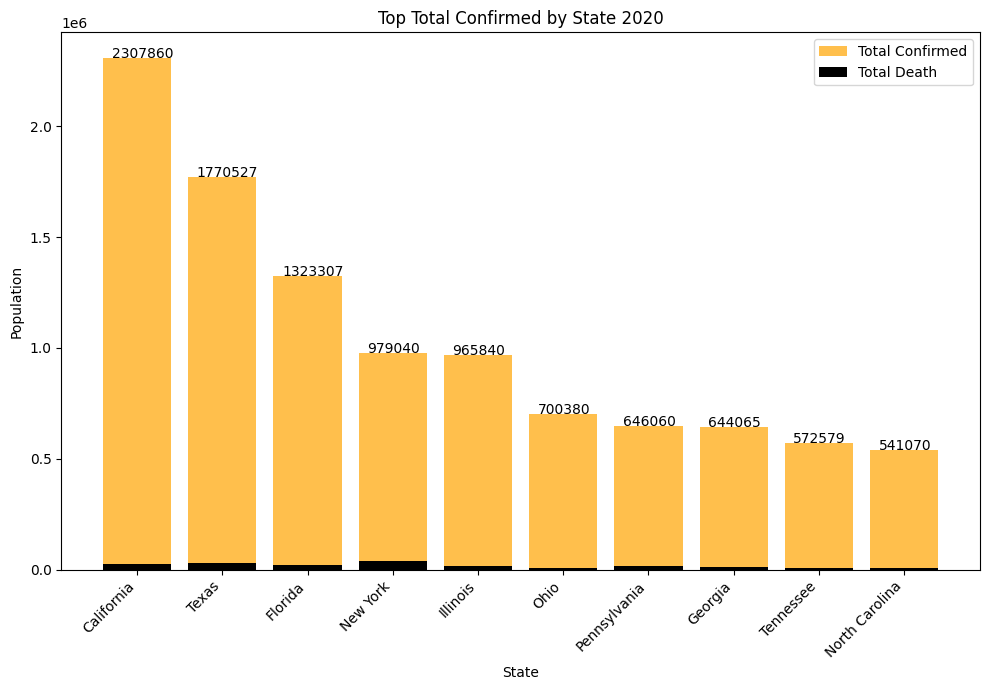

In [5]:
state_dt20 = dt20.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt20 = state_dt20.sort_values(by='Total Confirmed', ascending=False)

plt.figure(figsize=(10, 7))
state_dt20 = state_dt20.head(10)

for bar in plt.bar(state_dt20['State'], state_dt20['Total Confirmed'], color='orange', label='Total Confirmed', alpha=0.7):
    plt.annotate(bar.get_height(),xy=(bar.get_x()+0.1, bar.get_height()), fontsize=10)
plt.bar(state_dt20['State'], state_dt20['Total Death'], color='black', label='Total Death')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Top Total Confirmed by State 2020')

plt.xticks(rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()

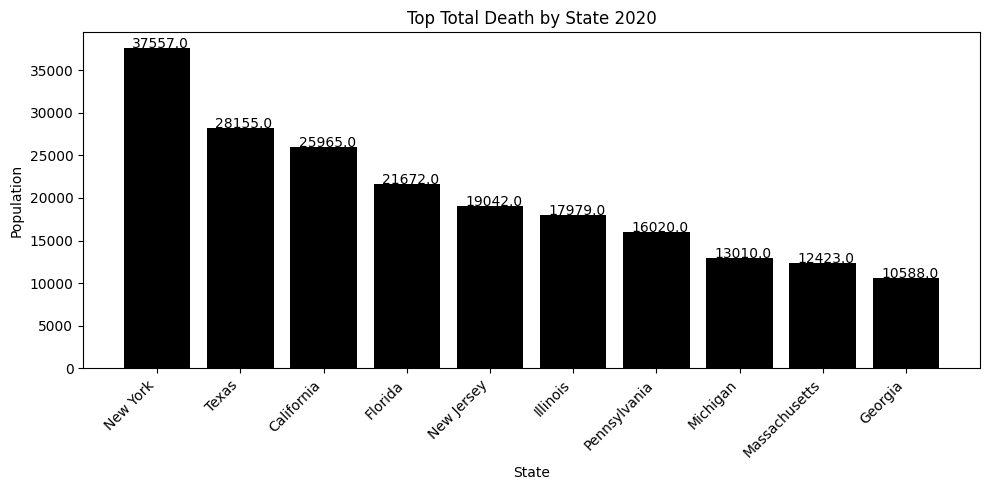

In [6]:
state_dt20 = dt20.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt20 = state_dt20.sort_values(by='Total Death', ascending=False)

plt.figure(figsize=(10, 5))
state_dt20 = state_dt20.head(10)

for bar in plt.bar(state_dt20['State'], state_dt20['Total Death'], color='black', label='Total Death'):
    plt.annotate(bar.get_height(),xy=(bar.get_x()+0.1, bar.get_height()), fontsize=10)

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Top Total Death by State 2020')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

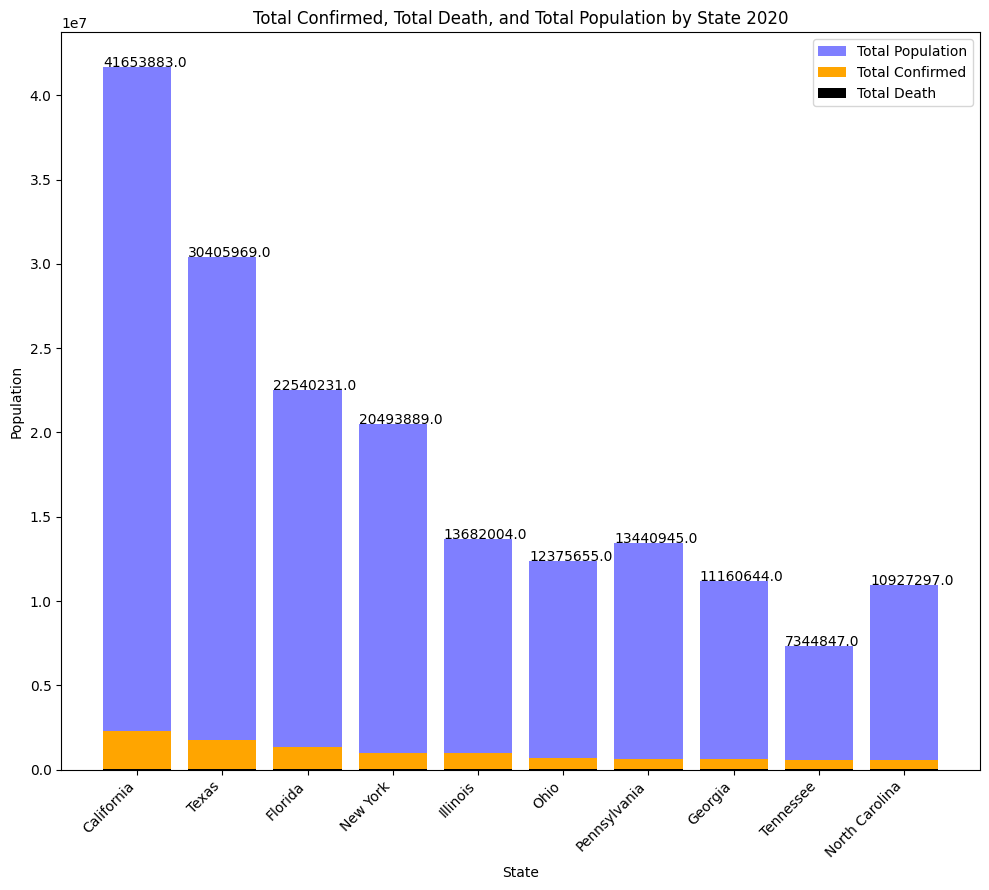

In [7]:
state_dt20 = dt20.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt20 = state_dt20.sort_values(by='Total Confirmed', ascending=False)

state_dt20 = state_dt20.merge(p20[['State', '2020 Population']], left_on='State', right_on='State', how='left')

state_dt20['Total Population'] = state_dt20['2020 Population'] + state_dt20['Total Confirmed']

state_dt20 = state_dt20.head(10)
plt.figure(figsize=(10, 9))

for bar in plt.bar(state_dt20['State'], state_dt20['Total Population'], color='blue', alpha=0.5, label='Total Population'):
    plt.annotate(bar.get_height(),xy=(bar.get_x(), bar.get_height()), fontsize=10)
plt.bar(state_dt20['State'], state_dt20['Total Confirmed'], color='orange', label='Total Confirmed')
plt.bar(state_dt20['State'], state_dt20['Total Death'], color='black', label='Total Death')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Total Confirmed, Total Death, and Total Population by State 2020')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

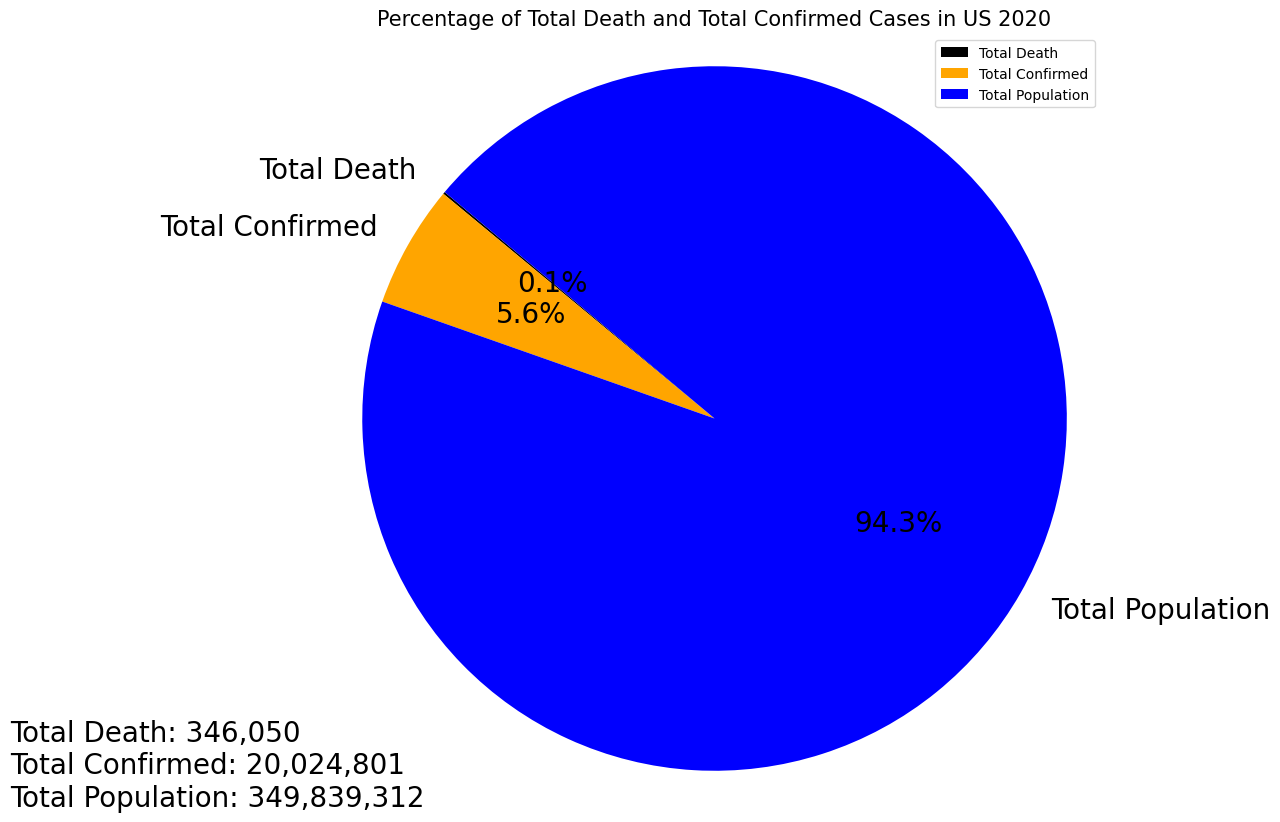

In [8]:
state_dt20 = dt20.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt20 = state_dt20.merge(p20[['State', '2020 Population']], left_on='State', right_on='State', how='left')
state_dt20['Total Population'] = state_dt20['2020 Population'] + state_dt20['Total Confirmed']

total_deaths = state_dt20['Total Death'].sum()
total_confirmed = state_dt20['Total Confirmed'].sum() - total_deaths
total_population = state_dt20['Total Population'].sum() - total_confirmed - total_deaths

formatted_total_deaths = '{:,}'.format(int(total_deaths))
formatted_total_confirmed = '{:,}'.format(int(state_dt20['Total Confirmed'].sum()))
formatted_total_population = '{:,}'.format(int(state_dt20['Total Population'].sum()))

labels = ['Total Death', 'Total Confirmed', 'Total Population']
sizes = [total_deaths, total_confirmed, total_population]
colors = ['black', 'orange', 'blue']

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: '{:.1f}%'.format(x), startangle=140,
        textprops={'fontsize': 20})

title_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}'
plt.title('Percentage of Total Death and Total Confirmed Cases in US 2020', fontsize=15)

total_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}\nTotal Population: {formatted_total_population}'
plt.text(-2, -1.1, total_text, fontsize=20)

plt.legend()

plt.axis('equal')
plt.show()

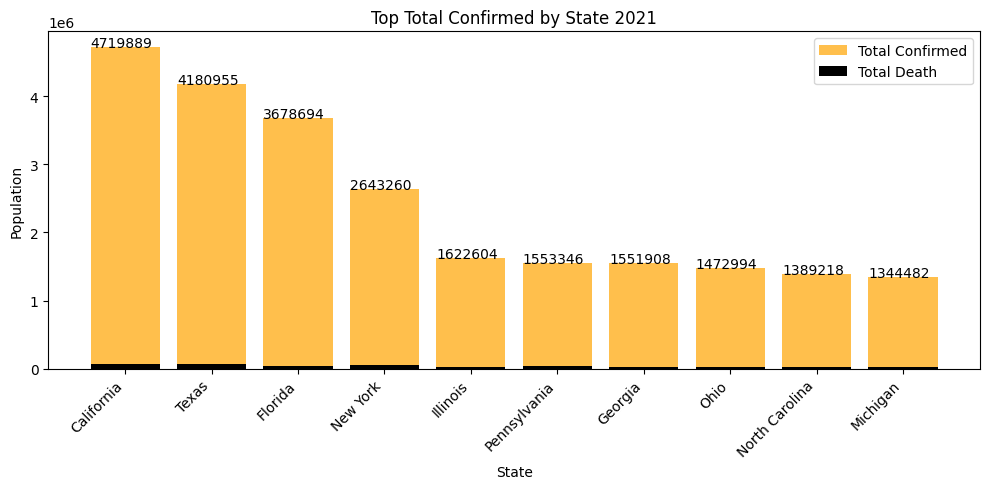

In [9]:
date21 = va
date21['Date'] = pd.to_datetime(va['Date'])
date21 = date21[date21['Date'].dt.year == 2021]
date21 = date21.groupby(['State', 'Admin 2 Level (City/County/Borough/Region)']).last().reset_index()

state_dt21 = date21.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt21 = state_dt21.sort_values(by='Total Confirmed', ascending=False)

plt.figure(figsize=(10, 5))
state_dt21 = state_dt21.head(10)

for bar in plt.bar(state_dt21['State'], state_dt21['Total Confirmed'], color='orange', label='Total Confirmed', alpha=0.7):
    plt.annotate(bar.get_height(),xy=(bar.get_x(), bar.get_height()), fontsize=10)
plt.bar(state_dt21['State'], state_dt21['Total Death'], color='black', label='Total Death')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Top Total Confirmed by State 2021')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

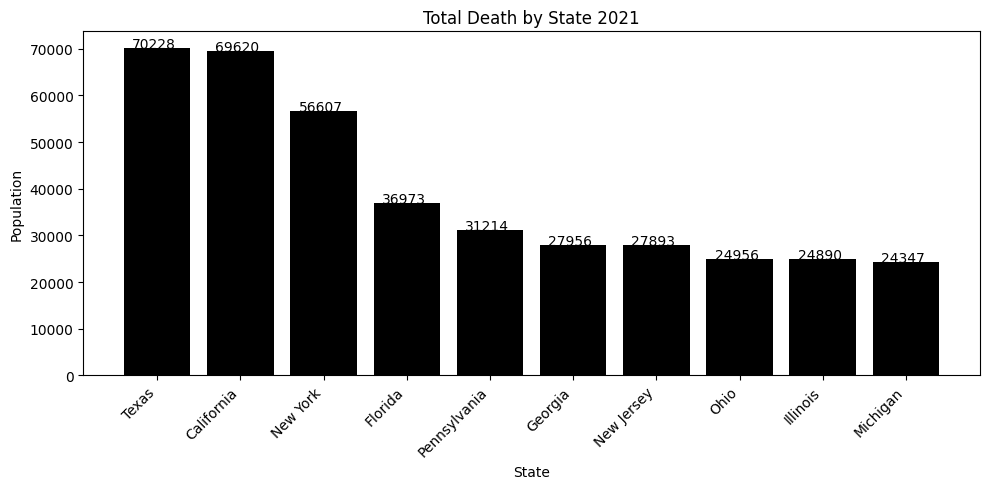

In [10]:
state_dt21 = date21.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt21 = state_dt21.sort_values(by='Total Death', ascending=False)

plt.figure(figsize=(10, 5))
state_dt21 = state_dt21.head(10)

for bar in plt.bar(state_dt21['State'], state_dt21['Total Death'], color='black', label='Total Death'):
        plt.annotate(bar.get_height(),xy=(bar.get_x()+0.1, bar.get_height()), fontsize=10)

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Total Death by State 2021')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

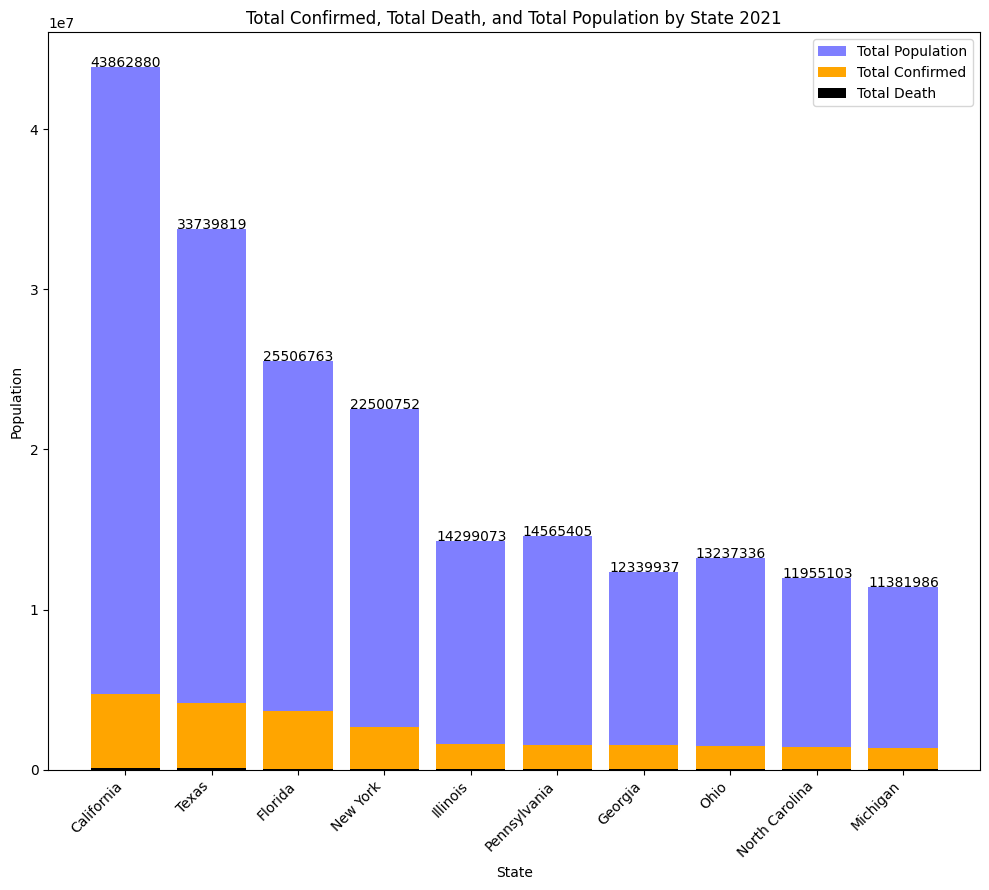

In [11]:
state_dt21 = date21.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt21 = state_dt21.sort_values(by='Total Confirmed', ascending=False)

state_dt21 = state_dt21.merge(p21[['State', '2021 Population']], left_on='State', right_on='State', how='left')

state_dt21['Total Population'] = state_dt21['2021 Population'] + state_dt21['Total Confirmed']

state_dt21 = state_dt21.head(10)
plt.figure(figsize=(10, 9))

for bar in plt.bar(state_dt21['State'], state_dt21['Total Population'], color='blue', alpha=0.5, label='Total Population'):
    plt.annotate(bar.get_height(),xy=(bar.get_x(), bar.get_height()), fontsize=10)
plt.bar(state_dt21['State'], state_dt21['Total Confirmed'], color='orange', label='Total Confirmed')
plt.bar(state_dt21['State'], state_dt21['Total Death'], color='black', label='Total Death')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Total Confirmed, Total Death, and Total Population by State 2021')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

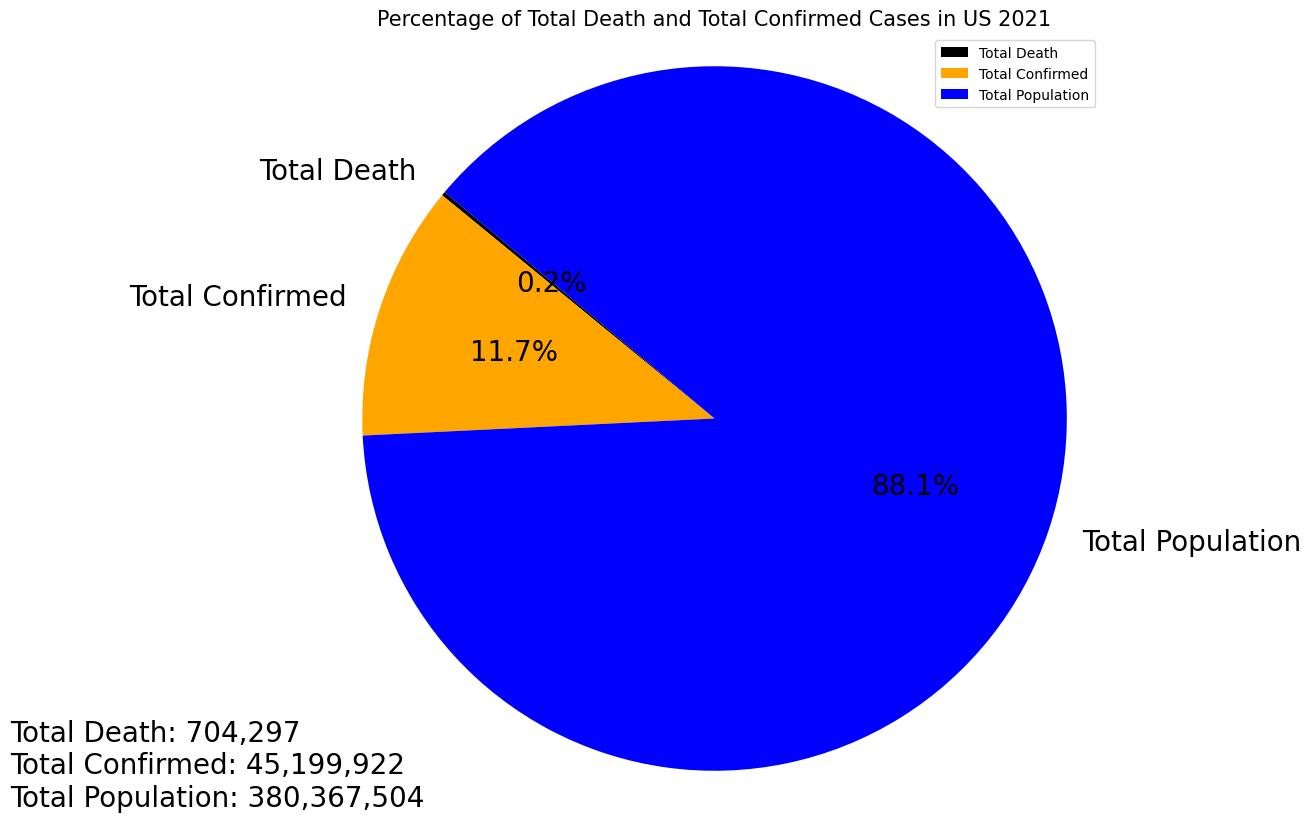

In [12]:
state_dt21 = date21.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_dt21 = state_dt21.merge(p21[['State', '2021 Population']], left_on='State', right_on='State', how='left')
state_dt21['Total Population'] = state_dt21['2021 Population'] + state_dt21['Total Confirmed']

total_deaths = state_dt21['Total Death'].sum()
total_confirmed = state_dt21['Total Confirmed'].sum() - total_deaths
total_population = state_dt21['Total Population'].sum() - total_confirmed - total_deaths

formatted_total_deaths = '{:,}'.format(int(total_deaths))
formatted_total_confirmed = '{:,}'.format(int(state_dt21['Total Confirmed'].sum()))
formatted_total_population = '{:,}'.format(int(state_dt21['Total Population'].sum()))

labels = ['Total Death', 'Total Confirmed', 'Total Population']
sizes = [total_deaths, total_confirmed, total_population]
colors = ['black', 'orange', 'blue']

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: '{:.1f}%'.format(x), startangle=140,
        textprops={'fontsize': 20})

title_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}'
plt.title('Percentage of Total Death and Total Confirmed Cases in US 2021', fontsize=15)

total_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}\nTotal Population: {formatted_total_population}'
plt.text(-2, -1.1, total_text, fontsize=20)

plt.legend()

plt.axis('equal')
plt.show()

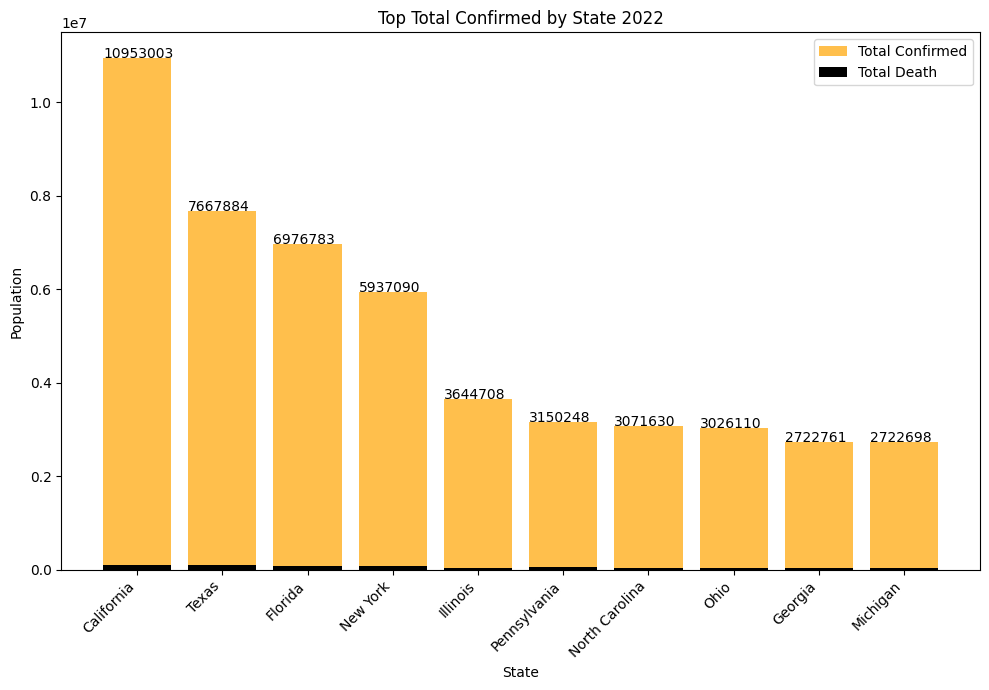

In [13]:
state_df = df.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_df = state_df.sort_values(by='Total Confirmed', ascending=False)

state_df = state_df.head(10)
plt.figure(figsize=(10, 7))

for bar in plt.bar(state_df['State'], state_df['Total Confirmed'], color='orange', label='Total Confirmed', alpha=0.7):
    plt.annotate(bar.get_height(),xy=(bar.get_x(), bar.get_height()), fontsize=10)
plt.bar(state_df['State'], state_df['Total Death'], color='black', label='Total Death')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Top Total Confirmed by State 2022')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

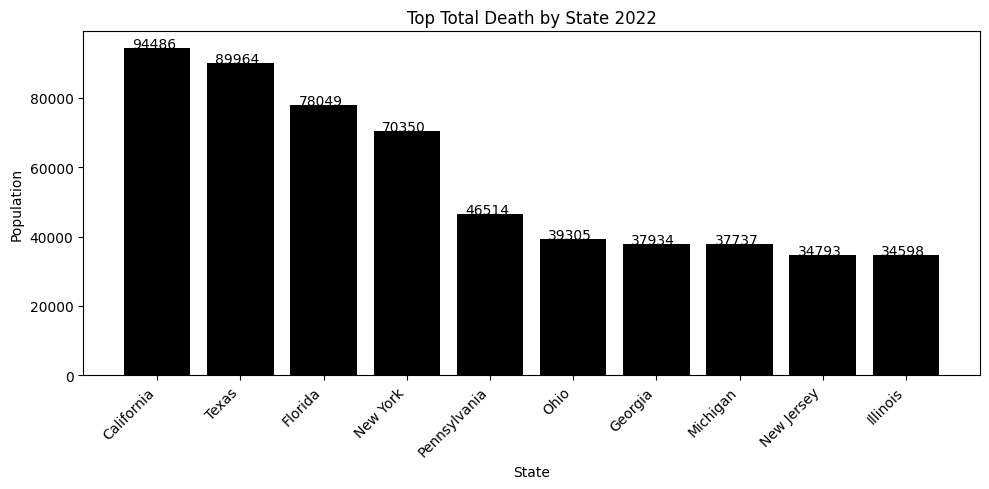

In [14]:
state_df = df.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_df = state_df.sort_values(by='Total Death', ascending=False)

state_df = state_df.head(10)
plt.figure(figsize=(10, 5))

for bar in plt.bar(state_df['State'], state_df['Total Death'], color='black', label='Total Death'):
    plt.annotate(bar.get_height(),xy=(bar.get_x()+0.1, bar.get_height()), fontsize=10)

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Top Total Death by State 2022')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

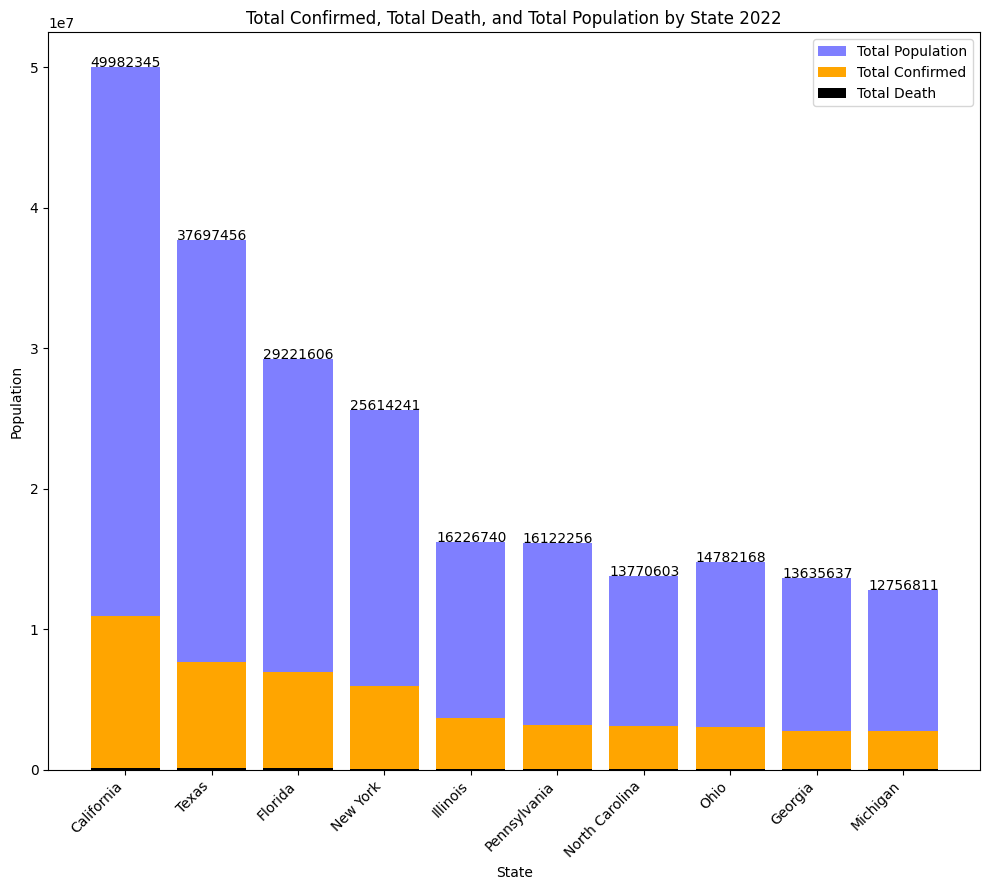

In [15]:
state_df = df.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_df = state_df.sort_values(by='Total Confirmed', ascending=False)

state_df = state_df.merge(p22[['State', '2022 Population']], left_on='State', right_on='State', how='left')

state_df['Total Population'] = state_df['2022 Population'] + state_df['Total Confirmed']

state_df = state_df.head(10)
plt.figure(figsize=(10, 9))

for bar in plt.bar(state_df['State'], state_df['Total Population'], color='blue', alpha=0.5, label='Total Population'):
    plt.annotate(bar.get_height(),xy=(bar.get_x(), bar.get_height()), fontsize=10)
plt.bar(state_df['State'], state_df['Total Confirmed'], color='orange', label='Total Confirmed')
plt.bar(state_df['State'], state_df['Total Death'], color='black', label='Total Death')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Total Confirmed, Total Death, and Total Population by State 2022')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

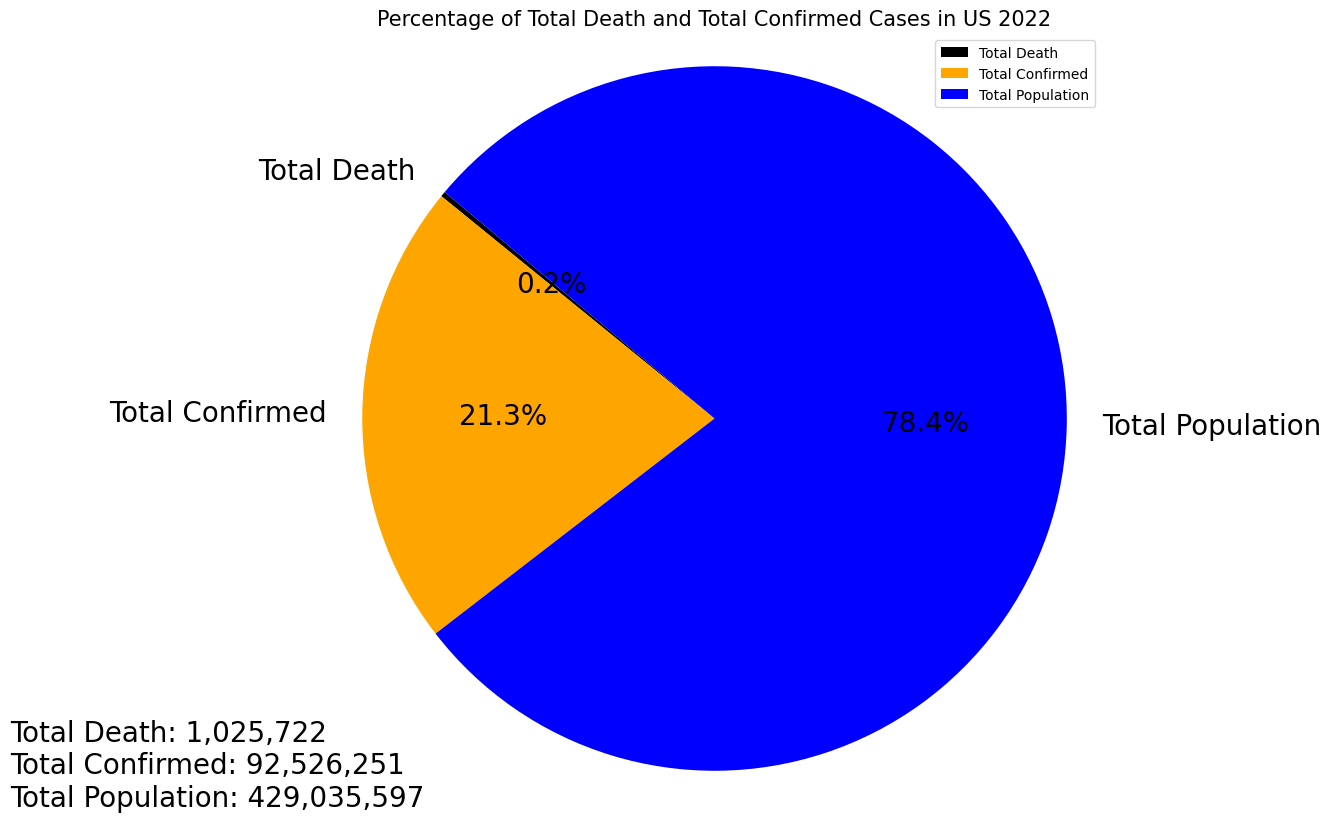

In [16]:
state_df = df.groupby('State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_df = state_df.merge(p22[['State', '2022 Population']], left_on='State', right_on='State', how='left')
state_df['Total Population'] = state_df['2022 Population'] + state_df['Total Confirmed']

total_deaths = state_df['Total Death'].sum()
total_confirmed = state_df['Total Confirmed'].sum() - total_deaths
total_population = state_df['Total Population'].sum() - total_confirmed - total_deaths

formatted_total_deaths = '{:,}'.format(int(total_deaths))
formatted_total_confirmed = '{:,}'.format(int(state_df['Total Confirmed'].sum()))
formatted_total_population = '{:,}'.format(int(state_df['Total Population'].sum()))

labels = ['Total Death', 'Total Confirmed', 'Total Population']
sizes = [total_deaths, total_confirmed, total_population]
colors = ['black', 'orange', 'blue']

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: '{:.1f}%'.format(x), startangle=140,
        textprops={'fontsize': 20})

title_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}'
plt.title('Percentage of Total Death and Total Confirmed Cases in US 2022', fontsize=15)

total_text = f'Total Death: {formatted_total_deaths}\nTotal Confirmed: {formatted_total_confirmed}\nTotal Population: {formatted_total_population}'
plt.text(-2, -1.1, total_text, fontsize=20)

plt.legend()

plt.axis('equal')
plt.show()

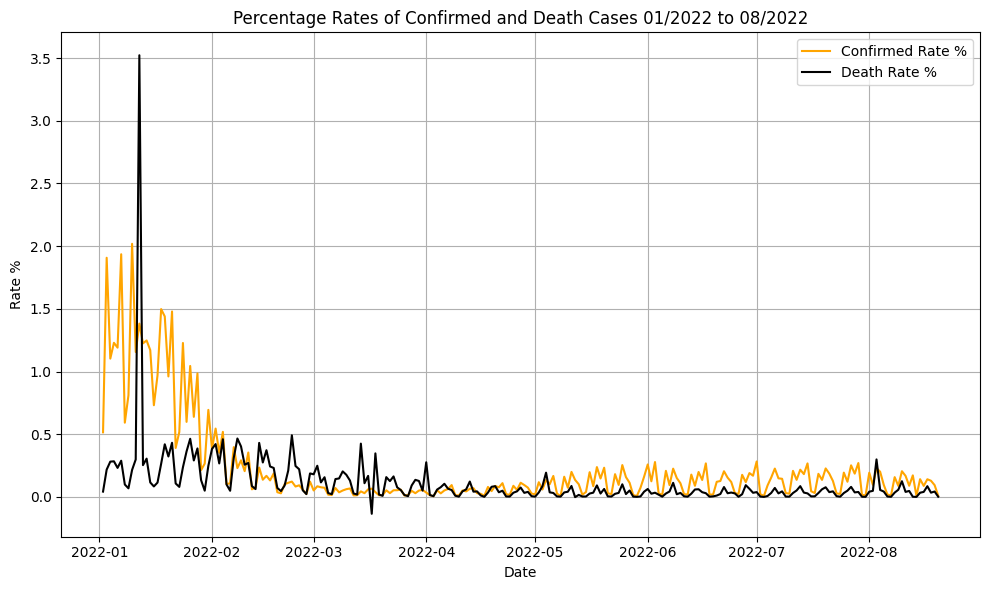

In [17]:
start_date = '2022-01-01'
end_date = '2022-08-20'

va['Date'] = pd.to_datetime(va['Date'])
filter_data = va[(va['Date'] >= start_date) & (va['Date'] <= end_date)]

rate_2022 = filter_data.groupby('Date').agg({'Total Confirmed': 'sum', 'Total Death': 'sum'}).reset_index()

rate_2022['Confirmed Rate %'] = rate_2022['Total Confirmed'].pct_change() * 100
rate_2022['Death Rate %'] = rate_2022['Total Death'].pct_change() * 100

plt.figure(figsize=(10, 6))

plt.plot(rate_2022['Date'], rate_2022['Confirmed Rate %'], color='orange', label='Confirmed Rate %')

plt.plot(rate_2022['Date'], rate_2022['Death Rate %'], color='black', label='Death Rate %')

plt.xlabel('Date')
plt.ylabel('Rate %')
plt.title('Percentage Rates of Confirmed and Death Cases 01/2022 to 08/2022')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()